## HELP International  case study - Hierarchical Clustering and Principal Component analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data , derive PCA and incremental PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mark the start timestamp of code execution
startTime = datetime.now()

print(startTime)

2019-02-23 19:31:30.459723


#### 1)  Import file , Change country case, remove spaces if any and perform duplicate check , get the file ready for analysis

In [3]:
#reading Dataset
ngo = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

# parse date
# retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [4]:
ngo.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


##### Capitalize and remove any spaces in the Country before checking for duplicate rows

In [5]:
ngo['country'] = ngo['country'].str.upper()
ngo['country'] = ngo['country'].str.strip()

In [6]:
ngo.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,AFGHANISTAN,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,ALBANIA,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


##### Check for duplicates now

In [7]:
print("(Rows, Columns) of dataset before dropping duplicates is :", format(ngo.shape))
ngo = ngo.drop_duplicates('country')
print("(Rows, Columns) of dataset after dropping duplicates is :", format(ngo.shape))
ngo.set_index('country')

ngo.head(2)

(Rows, Columns) of dataset before dropping duplicates is : (167, 10)
(Rows, Columns) of dataset after dropping duplicates is : (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,AFGHANISTAN,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,ALBANIA,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


##### there are No duplicate rows

##### Check for NULL values in the dataset

In [8]:
print("Column information : ")
ngo.info()

Column information : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [9]:
round(100*(ngo.isnull().sum()/len(ngo.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

`No null values to be cleaned` as seen above

In [10]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
####  This is how the data looks like before we build our Principal Components
#plt.figure(figsize = (20,10))
#sns.heatmap(ngo.corr(),annot = True)

In [12]:
# ngo = ngo_orig
ngo.reset_index()
ngo.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,AFGHANISTAN,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,ALBANIA,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [13]:
# Preserve original dataframe in case needed at a later time
ngo_orig = ngo

In [14]:
country_frame = pd.DataFrame(ngo.pop('country'))
country_frame.reindex()
country_frame.head(2)
ngo.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


#### 2) Analyse how many Components are necessary for PCA using Screeplot

In [15]:
from sklearn import preprocessing
ngo_scaler = preprocessing.StandardScaler().fit(ngo)
#y_scaler = preprocessing.StandardScaler().fit(y.values.reshape(-1,1))
ngo=ngo_scaler.transform(ngo) 
#y=y_scaler.transform(y.values.reshape(-1,1)) 

In [16]:
pd.DataFrame(ngo).head(2)

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623


In [17]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

In [18]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=100)
pca.fit(ngo)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':cols })

In [20]:
print(pca.components_.shape)
pcs_df = pd.DataFrame(pca.components_)

(9, 9)


In [21]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [22]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)
print (np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

pca.explained_variance_ratio_:  [46.  17.2 13.  11.1  7.3  2.5  1.3  1.   0.7]
[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


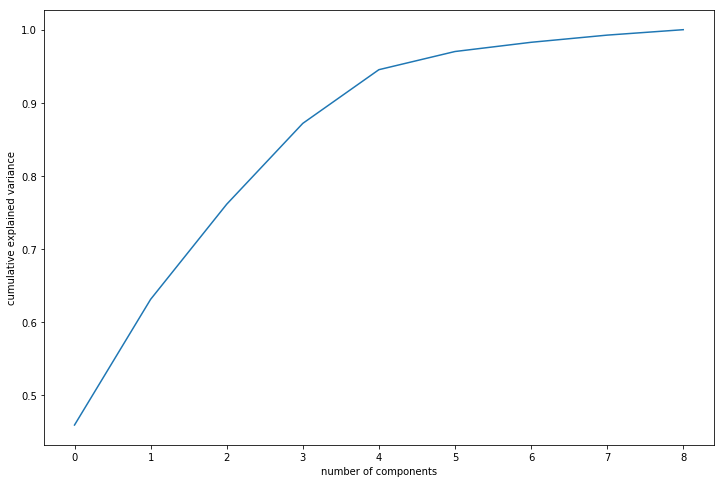

In [23]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### As can be seen from the scree plot , 4 components are sufficient to describe variance of 87% of data

In [24]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

0.0

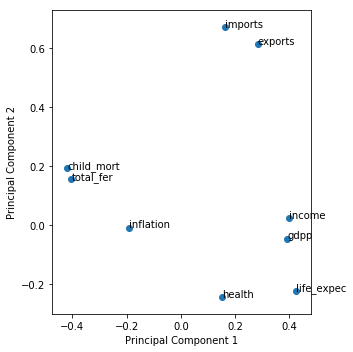

In [25]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

#### 3) Perform Incremental PCA on the number of components identified by Scree plot (4) 

In [26]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [27]:
df_pca = pd.DataFrame (pca_final.fit_transform(ngo) , columns =['PC1', 'PC2', 'PC3' ,'PC4'])
df_pca.reset_index()
df_pca.shape

(167, 4)

In [28]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


#### 4) Create Correlation matrix and ensure there is no Correlation between the Principal components created by PCA

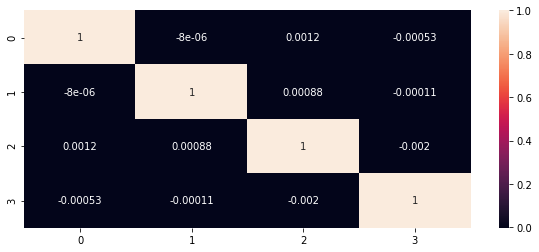

In [29]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,4))
sns.heatmap(corrmat,annot = True)

In [30]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
print(df_pca.shape)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543874 , min corr:  -0.0020378295355520564
(167, 4)


#### there is no correlation between any two components and PCA . This means -
- We effectively have removed multicollinearity from our situation, and our model design is stable

#### 5) Derive and analyse Hopkins statistics 

In [31]:
# Function for Hopkins statistics copied from the workbook provided with the PCA exercise
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
hopkins(df_pca)

0.824008353527587

#### 6) Derive Silhouette score and plot Silhouette analysis , find number of Optimum Clusters that best describe the data

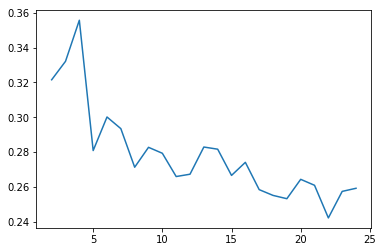

In [33]:
#Silhouette analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

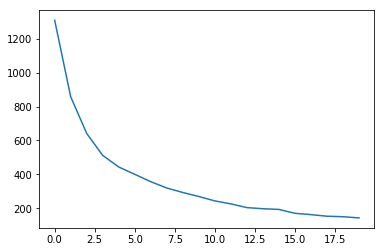

In [34]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### 7) Perform K-means Clustering with different K's i.e  K = 3 , 4 and 5 since Silhouette analysis suggests clusters between 2 to 5

In [35]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50 , random_state=35 )
model_clus3.fit(df_pca)

# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50 , random_state=35 )
model_clus4.fit(df_pca)

# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50 , random_state=35 )
model_clus5.fit(df_pca)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=35, tol=0.0001, verbose=0)

In [36]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [37]:
# analysis of clusters formed
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca3 = pd.concat([country_frame,  df_pca, pd.Series(model_clus3.labels_)], axis=1)
df_pca3.columns = [ 'country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

df_pca4 = pd.concat([country_frame , df_pca, pd.Series(model_clus4.labels_)], axis=1)
df_pca4.columns = [ 'country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

df_pca5 = pd.concat([country_frame , df_pca, pd.Series(model_clus5.labels_)], axis=1)
df_pca5.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

In [38]:
print(pd.DataFrame(df_pca3.groupby(["ClusterID"]).country.count()))
print(pd.DataFrame(df_pca4.groupby(["ClusterID"]).country.count()))
print(pd.DataFrame(df_pca5.groupby(["ClusterID"]).country.count()))

           country
ClusterID         
0               36
1               84
2               47
           country
ClusterID         
0                3
1               48
2               30
3               86
           country
ClusterID         
0               52
1               45
2               28
3                3
4               39


##### As seen above, five clusters best explain the data as they are spread up better than other K's

#### 8) Choose the Clusters derived with the Best K that describes the spread  (here 5)

In [39]:
# Let's see some samples
df_pca5.loc[(df_pca5['ClusterID']==1) ].head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,AFGHANISTAN,-2.913787,0.088354,0.721003,0.996699,1
3,ANGOLA,-2.930969,1.699437,-1.521734,0.875966,1
17,BENIN,-2.679195,0.391235,0.139349,0.321834,1
21,BOTSWANA,-0.881545,0.461932,0.620368,0.384517,1
25,BURKINA FASO,-3.125200,0.023315,0.410699,1.096936,1


#### 9) Add original columns to the dataframe and get a final dataframe for PCA + K-means clustered data for further analysis

In [40]:
ngo_kfinal = pd.concat([df_pca5  , ngo_orig] , axis = 1)

#### 10) Compute `Mean` for all the original dataframe columns to analyze and pick the best cluster around

In [41]:
cluster_child_mort = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).child_mort.mean())
cluster_exports = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).exports.mean())
cluster_health = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).health.mean())
cluster_imports = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).imports.mean())
cluster_income = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).income.mean())
cluster_inflation = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).inflation.mean())
cluster_life_expec = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).life_expec.mean())
cluster_total_fer = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(ngo_kfinal.groupby(["ClusterID"]).gdpp.mean())

df_k = pd.concat([pd.Series([0,1,2,3,4]), cluster_child_mort, cluster_exports, cluster_health
                ,cluster_imports, cluster_income , cluster_inflation, 
                cluster_life_expec , cluster_total_fer, cluster_gdpp ], axis=1)
df_k.columns = ["ClusterID", "cluster_child_mort", 'cluster_exports', 'cluster_health'
                ,'cluster_imports', 'cluster_income' , 'cluster_inflation', 
                'cluster_life_expec' , 'cluster_total_fer', 'cluster_gdpp']
df_k.head()

,ClusterID,cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_gdpp
0,0,16.971154,50.646154,6.985000,60.442308,13604.230769,3.780154,73.319231,2.126538,8024.923077
1,1,94.857778,28.289111,6.407778,43.026667,3493.177778,11.816111,58.926667,5.038667,1713.377778
2,2,5.046429,45.039286,9.240000,38.678571,46371.428571,2.860464,80.417857,1.823571,44803.571429
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,4,27.853846,29.986897,5.321795,30.729895,13026.923077,12.404513,72.371795,2.558718,6241.435897


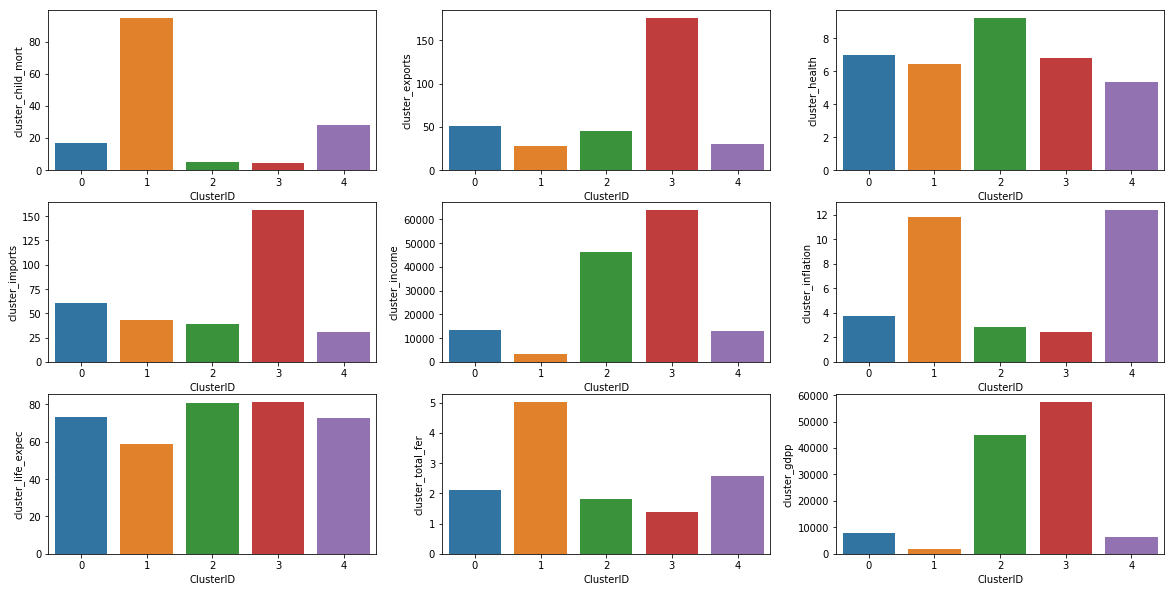

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_child_mort )
plt.subplot(3,3,2)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_exports)
plt.subplot(3,3,3)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_health)
plt.subplot(3,3,4)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_imports)
plt.subplot(3,3,5)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_income)
plt.subplot(3,3,6)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_inflation)
plt.subplot(3,3,7)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_life_expec)
plt.subplot(3,3,8)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_total_fer)
plt.subplot(3,3,9)
sns.barplot(x=df_k.ClusterID, y=df_k.cluster_gdpp)

plt.show()

##### Result: As seen above, Cluster 1 is the one needing most attention due to the following reasons: <br>
1) Child mortality is extremely high as compared to other clusters <br>
2) exports, imports, income and gdpp is low <br>
3) Inflation is high <br>
4) Total fertility rates are high (uncontrolled population growth) <br>

In [43]:
k_selected = ngo_kfinal.loc[(ngo_kfinal['ClusterID']==1)]

##### Plot one variable against another with Cluster as hue and see if there is any interpretation that can be derived

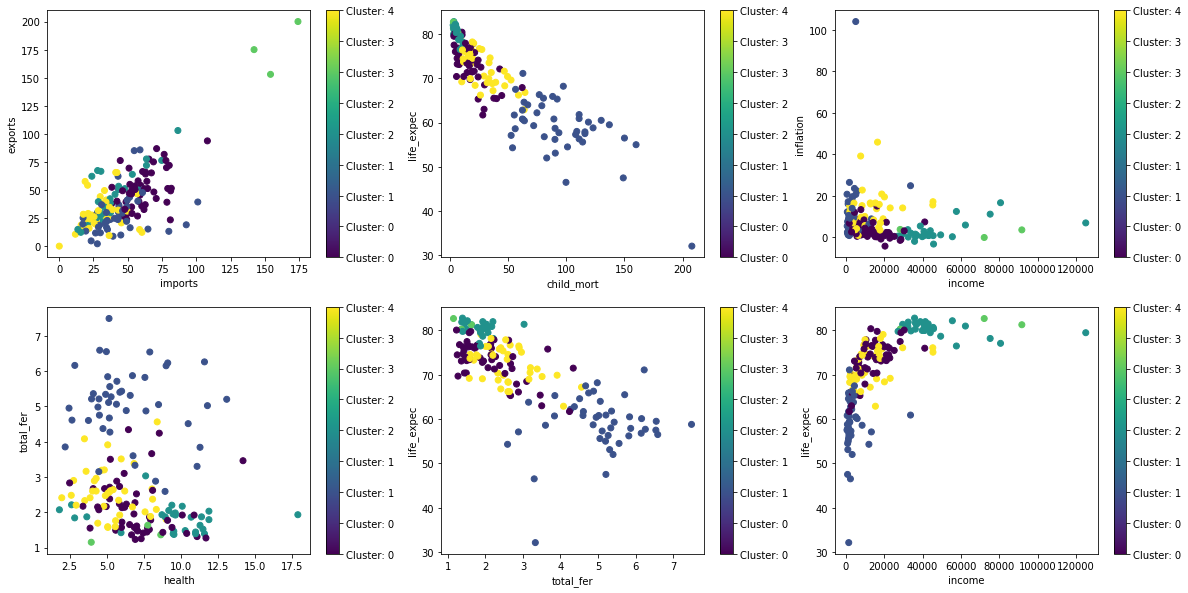

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sctr = plt.scatter(ngo_kfinal['imports'], ngo_kfinal['exports'], c=ngo_kfinal['ClusterID'])
plt.xlabel("imports")
plt.ylabel("exports")
plt.colorbar(sctr, format='Cluster: %d')

plt.subplot(2,3,2)
plt.scatter(ngo_kfinal['child_mort'], ngo_kfinal['life_expec'], c=ngo_kfinal['ClusterID'])
plt.xlabel("child_mort")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,3)
plt.scatter(ngo_kfinal['income'], ngo_kfinal['inflation'], c=ngo_kfinal['ClusterID'])
plt.xlabel("income")
plt.ylabel("inflation")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,4)
plt.scatter(ngo_kfinal['health'], ngo_kfinal['total_fer'], c=ngo_kfinal['ClusterID'])
plt.xlabel("health")
plt.ylabel("total_fer")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,5)
plt.scatter(ngo_kfinal['total_fer'], ngo_kfinal['life_expec'], c=ngo_kfinal['ClusterID'])
plt.xlabel("total_fer")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,6)
plt.scatter(ngo_kfinal['income'], ngo_kfinal['life_expec'], c=ngo_kfinal['ClusterID'])
plt.xlabel("income")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.show()

#### 11) Derive Mean, Q1, Q2, Q3 and Q4 of important variables 

##### let's analyze box plots on child mortality , inflation and gdpp 

In [45]:
print ("**************** ")
print ("CHILD MORTALITY ")
print ("**************** ")
print ("MEAN" , k_selected.child_mort.mean())
print ("MEDIAN" , k_selected.child_mort.median())
print ("1ST QUANTILE (Q1)" , k_selected.child_mort.quantile(0.25))
# Median same as Q2
print ("2ND QUANTILE (Q2)" , k_selected.child_mort.quantile(0.50))
print ("3RD QUANTILE (Q3)" , k_selected.child_mort.quantile(0.75))
print ("4TH QUANTILE (Q4)" , k_selected.child_mort.quantile(1))

print ("**************** ")
print ("GDPP ")
print ("**************** ")
print ("MEAN" , k_selected.gdpp.mean())
print ("MEDIAN" , k_selected.gdpp.median())
print ("1ST QUANTILE (Q1)" , k_selected.gdpp.quantile(0.25))
print ("2ND QUANTILE (Q2)" , k_selected.gdpp.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , k_selected.gdpp.quantile(0.75))
print ("4TH QUANTILE (Q4) " , k_selected.gdpp.quantile(1))



print ("**************** ")
print ("INFLATION ")
print ("**************** ")
print ("MEAN" , k_selected.inflation.mean())
print ("MEDIAN" , k_selected.inflation.median())
print ("1ST QUANTILE (Q1)" , k_selected.inflation.quantile(0.25))
print ("2ND QUANTILE (Q2)" , k_selected.inflation.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , k_selected.inflation.quantile(0.75))
print ("4TH QUANTILE (Q4) " , k_selected.inflation.quantile(1))




**************** 
CHILD MORTALITY 
**************** 
MEAN 94.85777777777778
MEDIAN 90.3
1ST QUANTILE (Q1) 66.8
2ND QUANTILE (Q2) 90.3
3RD QUANTILE (Q3) 111.0
4TH QUANTILE (Q4) 208.0
**************** 
GDPP 
**************** 
MEAN 1713.3777777777777
MEDIAN 769.0
1ST QUANTILE (Q1) 547.0
2ND QUANTILE (Q2) 769.0
3RD QUANTILE (Q3) 1310.0
4TH QUANTILE (Q4)  17100.0
**************** 
INFLATION 
**************** 
MEAN 11.81611111111111
MEDIAN 8.79
1ST QUANTILE (Q1) 3.87
2ND QUANTILE (Q2) 8.79
3RD QUANTILE (Q3) 16.1
4TH QUANTILE (Q4)  104.0


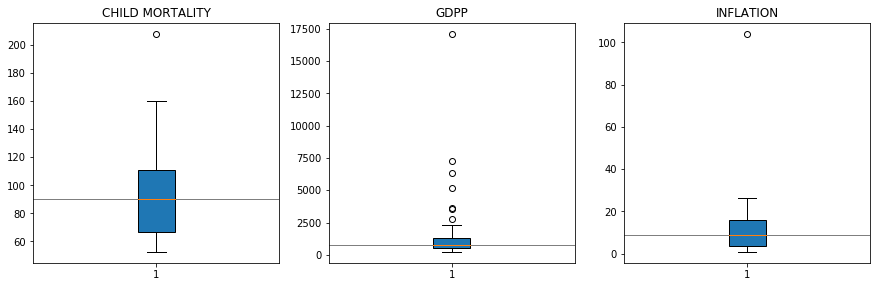

In [46]:
plt.figure(1 , figsize=(15, 15))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(3, 3, 1)
plt.title("CHILD MORTALITY")
plt.boxplot(k_selected['child_mort'] , patch_artist=True)
plt.axhline(90.3, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 2)
plt.title("GDPP")
plt.boxplot(k_selected['gdpp'], patch_artist=True)
plt.axhline(769, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 3)
plt.title("INFLATION")
plt.boxplot(k_selected['inflation'], patch_artist=True)
plt.axhline(8.79, color='black', lw=.5)



plt.show()

#### 12) We see some outliers within GDPP and data is skewed up, so we will have to remove them before we finalize on countries

{'whiskers': [<matplotlib.lines.Line2D at 0x1a21703b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a217a84a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a21703d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1a217a8a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a217a8dd8>],
 'means': []}

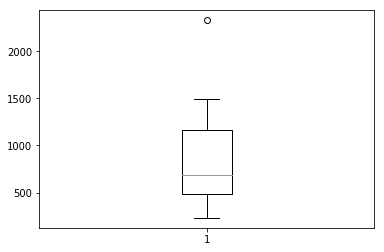

In [47]:
# outlier treatment for gdpp
Q1 = k_selected.gdpp.quantile(0.25)
Q3 = k_selected.gdpp.quantile(0.75)
IQR = Q3 - Q1
dropped_kselected = k_selected[~((k_selected.gdpp >= Q1 - 1.5*IQR) & (k_selected.gdpp <= Q3 + 1.5*IQR))]
k_selected = k_selected[(k_selected.gdpp >= Q1 - 1.5*IQR) & (k_selected.gdpp <= Q3 + 1.5*IQR)]
plt.boxplot(k_selected.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a203f7c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22499940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a203f7eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a22499128>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a224997f0>],
 'means': []}

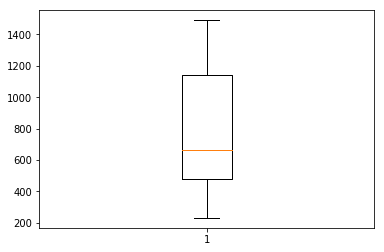

In [48]:
# outlier treatment for gdpp
Q1 = k_selected.gdpp.quantile(0.25)
Q3 = k_selected.gdpp.quantile(0.75)
IQR = Q3 - Q1
dropped_kselected_2 = k_selected[~((k_selected.gdpp >= Q1 - 1.5*IQR) & (k_selected.gdpp <= Q3 + 1.5*IQR))]
k_selected = k_selected[(k_selected.gdpp >= Q1 - 1.5*IQR) & (k_selected.gdpp <= Q3 + 1.5*IQR)]
plt.boxplot(k_selected.gdpp)

#### This looks good now, let's run the numbers again

In [49]:
print ("**************** ")
print ("CHILD MORTALITY ")
print ("**************** ")
print ("MEAN" , k_selected.child_mort.mean())
print ("MEDIAN" , k_selected.child_mort.median())
print ("1ST QUANTILE (Q1)" , k_selected.child_mort.quantile(0.25))
# Median same as Q2
print ("2ND QUANTILE (Q2)" , k_selected.child_mort.quantile(0.50))
print ("3RD QUANTILE (Q3)" , k_selected.child_mort.quantile(0.75))
print ("4TH QUANTILE (Q4)" , k_selected.child_mort.quantile(1))

print ("**************** ")
print ("GDPP ")
print ("**************** ")
print ("MEAN" , k_selected.gdpp.mean())
print ("MEDIAN" , k_selected.gdpp.median())
print ("1ST QUANTILE (Q1)" , k_selected.gdpp.quantile(0.25))
print ("2ND QUANTILE (Q2)" , k_selected.gdpp.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , k_selected.gdpp.quantile(0.75))
print ("4TH QUANTILE (Q4) " , k_selected.gdpp.quantile(1))



print ("**************** ")
print ("INFLATION ")
print ("**************** ")
print ("MEAN" , k_selected.inflation.mean())
print ("MEDIAN" , k_selected.inflation.median())
print ("1ST QUANTILE (Q1)" , k_selected.inflation.quantile(0.25))
print ("2ND QUANTILE (Q2)" , k_selected.inflation.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , k_selected.inflation.quantile(0.75))
print ("4TH QUANTILE (Q4) " , k_selected.inflation.quantile(1))

**************** 
CHILD MORTALITY 
**************** 
MEAN 97.83513513513515
MEDIAN 90.5
1ST QUANTILE (Q1) 76.7
2ND QUANTILE (Q2) 90.5
3RD QUANTILE (Q3) 111.0
4TH QUANTILE (Q4) 208.0
**************** 
GDPP 
**************** 
MEAN 783.2972972972973
MEDIAN 662.0
1ST QUANTILE (Q1) 482.0
2ND QUANTILE (Q2) 662.0
3RD QUANTILE (Q3) 1140.0
4TH QUANTILE (Q4)  1490.0
**************** 
INFLATION 
**************** 
MEAN 8.497162162162164
MEDIAN 6.81
1ST QUANTILE (Q1) 2.97
2ND QUANTILE (Q2) 6.81
3RD QUANTILE (Q3) 12.1
4TH QUANTILE (Q4)  23.6


#### 13)  Let's pick all countries with child mortality >  90.5 (Q2/median) , GDPP < 482.0  (Q1) and inflation >6.81 (Q2/median) . This is in line with the requirement that countries in direst need of the aid should be helped and the plots reveal that these columns represent the most pressing needs of the poorest countries

In [50]:
k_selected_poor = k_selected.loc[(k_selected['child_mort'] >  90.5 )
                                & (k_selected['gdpp'] < 482.0)
                                & (k_selected['inflation'] > 6.81)] 
k_selected_poor = k_selected_poor.drop(['PC1', 'PC2', 'PC3' , 'PC4'], axis = 1)

In [51]:
k_selected_poor

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,BURUNDI,1,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"CONGO, DEM. REP.",1,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
106,MOZAMBIQUE,1,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
132,SIERRA LEONE,1,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


#### 14) As per K-means clustering, 4 Countries in direst need of the aid are given below ; incidentally all four are African countries

1) `BURUNDI` <br>
2) `CONGO, DEM. REP.` <br>
3) `MOZAMBIQUE` <br>
4) `SIERRA LEONE` <br>

In [52]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


#### 15) Perform Hierarchical Clustering 

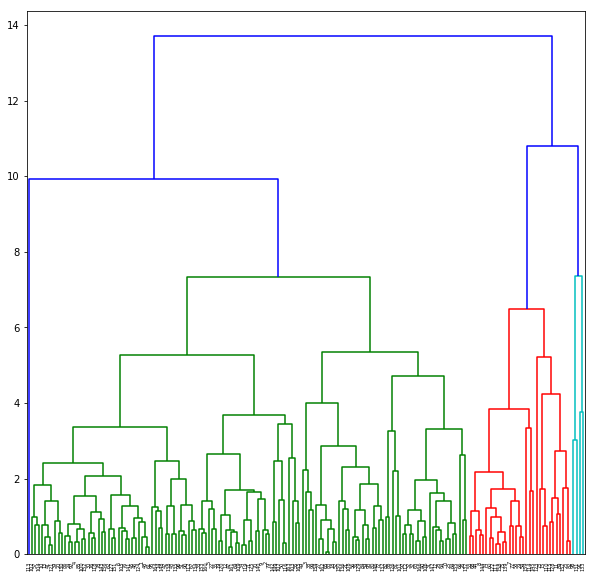

In [53]:
plt.figure(1 , figsize=(10, 10))


mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### 16) Cut Dendrograms at the longest line i.e. at  `8` and concatenate with the original data frame

In [54]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 8).reshape(-1,))
ngo_hfinal = pd.concat([country_frame , clusterCut  , ngo_orig] , axis = 1)
ngo_hfinal.columns = [ 'country' , 'ClusterID', 'child_mort',    'exports',     'health',    'imports',
           'income',  'inflation', 'life_expec',  'total_fer',       'gdpp']

In [55]:
print(pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).country.count()))

           country
ClusterID         
0               25
1               81
2               25
3               20
4               11
5                2
6                2
7                1


#### 17) Compute `Mean` for all the original dataframe columns and plot them to analyze and pick the best cluster around

In [56]:
cluster_child_mort = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).child_mort.mean())
cluster_exports = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).exports.mean())
cluster_health = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).health.mean())
cluster_imports = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).imports.mean())
cluster_income = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).income.mean())
cluster_inflation = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).inflation.mean())
cluster_life_expec = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).life_expec.mean())
cluster_total_fer = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(ngo_hfinal.groupby(["ClusterID"]).gdpp.mean())

df_h = pd.concat([pd.Series([0,1,2,3,4,5,6,7]), cluster_child_mort, cluster_exports, cluster_health
                ,cluster_imports, cluster_income , cluster_inflation, 
                cluster_life_expec , cluster_total_fer, cluster_gdpp ], axis=1)
df_h.columns = ["ClusterID", "cluster_child_mort", 'cluster_exports', 'cluster_health'
                ,'cluster_imports', 'cluster_income' , 'cluster_inflation', 
                'cluster_life_expec' , 'cluster_total_fer', 'cluster_gdpp']
df_h.head()

,ClusterID,cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_gdpp
0,0,107.144000,23.244800,7.682400,46.272000,1629.720000,7.428600,56.056000,5.318800,787.240000
1,1,22.485185,37.924432,6.305185,43.689702,12657.160494,8.032272,73.307407,2.316667,7282.592593
2,2,61.764000,44.152000,5.517200,53.876000,6145.600000,8.940800,63.608000,3.978800,2980.520000
3,3,4.280000,34.270000,10.501000,32.745000,39690.000000,1.559750,80.970000,1.797500,45060.000000
4,4,9.518182,70.536364,5.330909,48.890909,57463.636364,9.211636,77.790909,2.192727,35809.090909


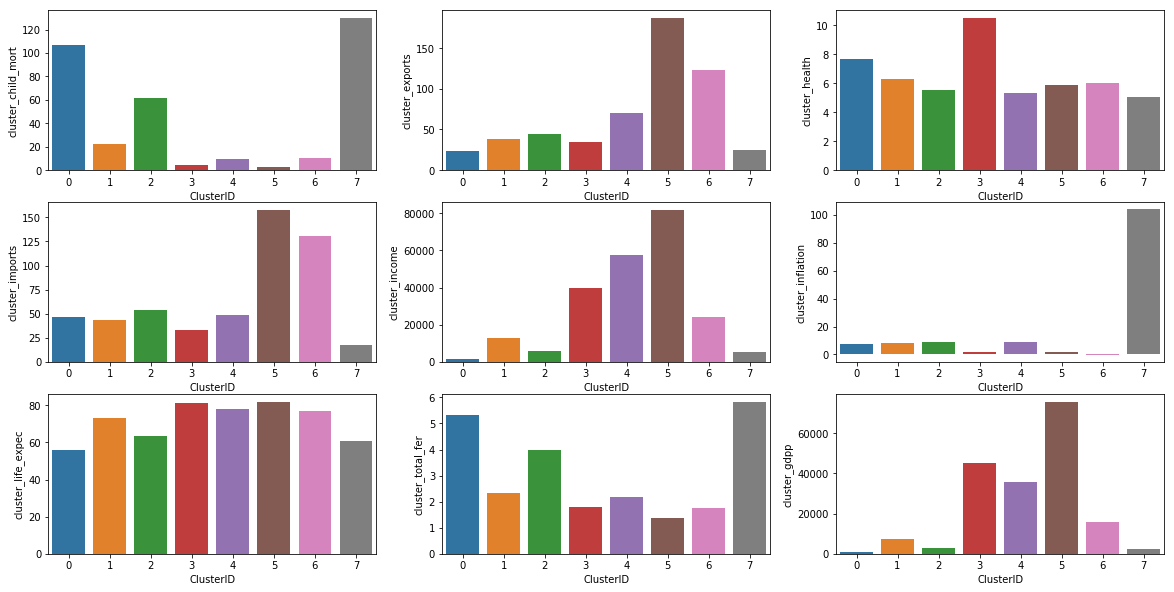

In [57]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_child_mort )
plt.subplot(3,3,2)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_exports)
plt.subplot(3,3,3)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_health)
plt.subplot(3,3,4)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_imports)
plt.subplot(3,3,5)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_income)
plt.subplot(3,3,6)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_inflation)
plt.subplot(3,3,7)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_life_expec)
plt.subplot(3,3,8)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_total_fer)
plt.subplot(3,3,9)
sns.barplot(x=df_h.ClusterID, y=df_h.cluster_gdpp)

plt.show()

##### Result: As seen above, Cluster 0 is the one needing most attention due to the following reasons: <br>
1) GDPP is least as compared to other countries <br>
2) Income is the least as compared to all other clusters <br>
4) Total fertility rates are high in clusters 0 and 7 but 0 tops as per first two points above(uncontrolled population growth) <br>
5) Life expectancy rates are least in clusters 0 and 7 but 0 tops as per first two points above(uncontrolled population growth) <br>

In [58]:
h_selected = ngo_hfinal.loc[(ngo_hfinal['ClusterID']==0)]

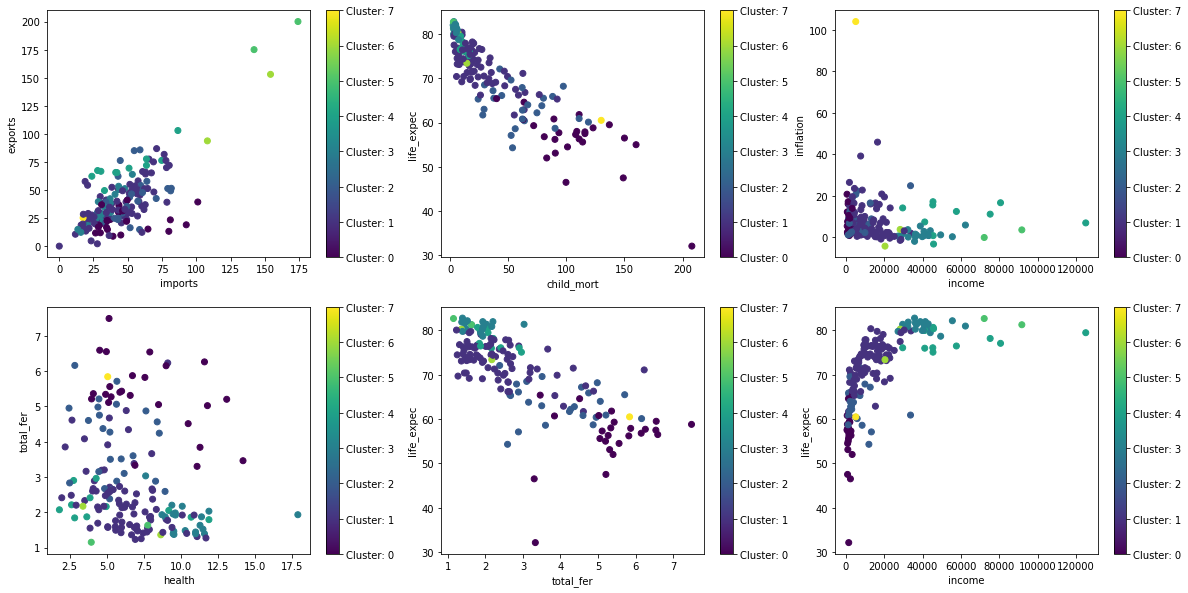

In [59]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sctr = plt.scatter(ngo_hfinal['imports'], ngo_hfinal['exports'], c=ngo_hfinal['ClusterID'])
plt.xlabel("imports")
plt.ylabel("exports")
plt.colorbar(sctr, format='Cluster: %d')

plt.subplot(2,3,2)
plt.scatter(ngo_hfinal['child_mort'], ngo_hfinal['life_expec'], c=ngo_hfinal['ClusterID'])
plt.xlabel("child_mort")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,3)
plt.scatter(ngo_hfinal['income'], ngo_hfinal['inflation'], c=ngo_hfinal['ClusterID'])
plt.xlabel("income")
plt.ylabel("inflation")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,4)
plt.scatter(ngo_hfinal['health'], ngo_hfinal['total_fer'], c=ngo_hfinal['ClusterID'])
plt.xlabel("health")
plt.ylabel("total_fer")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,5)
plt.scatter(ngo_hfinal['total_fer'], ngo_hfinal['life_expec'], c=ngo_hfinal['ClusterID'])
plt.xlabel("total_fer")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.subplot(2,3,6)
plt.scatter(ngo_hfinal['income'], ngo_hfinal['life_expec'], c=ngo_hfinal['ClusterID'])
plt.xlabel("income")
plt.ylabel("life_expec")
plt.colorbar(sctr, format='Cluster: %d')


plt.show()

#### 18) Derive Mean, Q1, Q2, Q3 and Q4 of important variables 

In [60]:
print ("**************** ")
print ("CHILD MORTALITY ")
print ("**************** ")
print ("MEAN" , h_selected.child_mort.mean())
print ("MEDIAN" , h_selected.child_mort.median())
print ("1ST QUANTILE (Q1)" , h_selected.child_mort.quantile(0.25))
# Median same as Q2
print ("2ND QUANTILE (Q2)" , h_selected.child_mort.quantile(0.50))
print ("3RD QUANTILE (Q3)" , h_selected.child_mort.quantile(0.75))
print ("4TH QUANTILE (Q4)" , h_selected.child_mort.quantile(1))

print ("**************** ")
print ("GDPP ")
print ("**************** ")
print ("MEAN" , h_selected.gdpp.mean())
print ("MEDIAN" , h_selected.gdpp.median())
print ("1ST QUANTILE (Q1)" , h_selected.gdpp.quantile(0.25))
print ("2ND QUANTILE (Q2)" , h_selected.gdpp.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , h_selected.gdpp.quantile(0.75))
print ("4TH QUANTILE (Q4) " , h_selected.gdpp.quantile(1))



print ("**************** ")
print ("INFLATION ")
print ("**************** ")
print ("MEAN" , h_selected.inflation.mean())
print ("MEDIAN" , h_selected.inflation.median())
print ("1ST QUANTILE (Q1)" , h_selected.inflation.quantile(0.25))
print ("2ND QUANTILE (Q2)" , h_selected.inflation.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , h_selected.inflation.quantile(0.75))
print ("4TH QUANTILE (Q4) " , h_selected.inflation.quantile(1))

**************** 
CHILD MORTALITY 
**************** 
MEAN 107.14399999999999
MEDIAN 108.0
1ST QUANTILE (Q1) 89.3
2ND QUANTILE (Q2) 108.0
3RD QUANTILE (Q3) 116.0
4TH QUANTILE (Q4) 208.0
**************** 
GDPP 
**************** 
MEAN 787.24
MEDIAN 595.0
1ST QUANTILE (Q1) 446.0
2ND QUANTILE (Q2) 595.0
3RD QUANTILE (Q3) 897.0
4TH QUANTILE (Q4)  2860.0
**************** 
INFLATION 
**************** 
MEAN 7.4286
MEDIAN 5.47
1ST QUANTILE (Q1) 2.97
2ND QUANTILE (Q2) 5.47
3RD QUANTILE (Q3) 10.6
4TH QUANTILE (Q4)  20.8


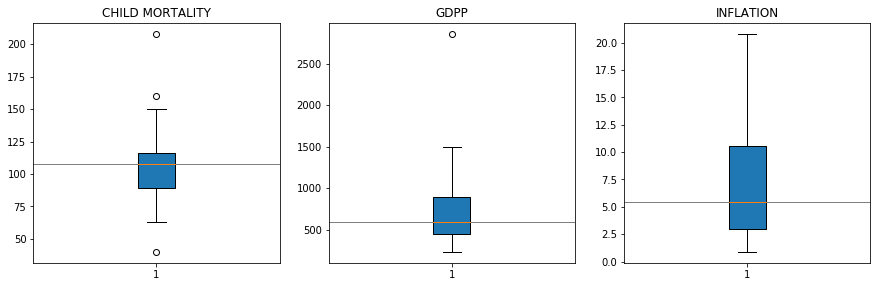

In [61]:
plt.figure(1 , figsize=(15, 15))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(3, 3, 1)
plt.title("CHILD MORTALITY")
plt.boxplot(h_selected['child_mort'] , patch_artist=True)
plt.axhline(108, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 2)
plt.title("GDPP")
plt.boxplot(h_selected['gdpp'], patch_artist=True)
plt.axhline(595, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 3)
plt.title("INFLATION")
plt.boxplot(h_selected['inflation'], patch_artist=True)
plt.axhline(5.47, color='black', lw=.5)



plt.show()

#### Let's remove outliers within GDPP and data is skewed up, so we will have to remove them before we finalize on countries

{'whiskers': [<matplotlib.lines.Line2D at 0x1a237fd240>,
 'caps': [<matplotlib.lines.Line2D at 0x1a237fd8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a237fd0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a237fdf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a238082e8>],
 'means': []}

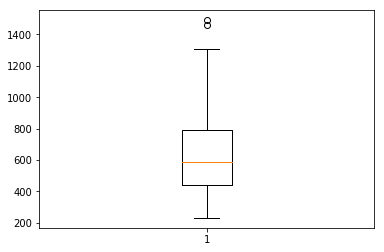

In [62]:
# outlier treatment for gdpp
Q1 = h_selected.gdpp.quantile(0.25)
Q3 = h_selected.gdpp.quantile(0.75)
IQR = Q3 - Q1
dropped_hselected = h_selected[~((h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR))]
h_selected = h_selected[(h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR)]
plt.boxplot(h_selected.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2381c278>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2381c908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2381c128>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2381cf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23826320>],
 'means': []}

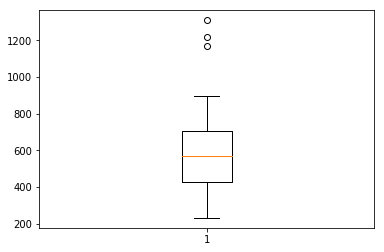

In [63]:
# outlier treatment for gdpp
Q1 = h_selected.gdpp.quantile(0.25)
Q3 = h_selected.gdpp.quantile(0.75)
IQR = Q3 - Q1
dropped_hselected2 = h_selected[~((h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR))]
h_selected = h_selected[(h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR)]
plt.boxplot(h_selected.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23948dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a239524a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23948c88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23952b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23952e80>],
 'means': []}

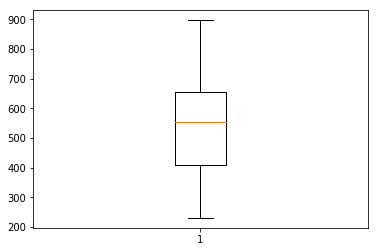

In [64]:
# outlier treatment for gdpp
Q1 = h_selected.gdpp.quantile(0.25)
Q3 = h_selected.gdpp.quantile(0.75)
IQR = Q3 - Q1
dropped_hselected3 = h_selected[~((h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR))]
h_selected = h_selected[(h_selected.gdpp >= Q1 - 1.5*IQR) & (h_selected.gdpp <= Q3 + 1.5*IQR)]
plt.boxplot(h_selected.gdpp)

#### This looks good now, let's run the numbers and plot again

In [65]:
print ("**************** ")
print ("CHILD MORTALITY ")
print ("**************** ")
print ("MEAN" , h_selected.child_mort.mean())
print ("MEDIAN" , h_selected.child_mort.median())
print ("1ST QUANTILE (Q1)" , h_selected.child_mort.quantile(0.25))
# Median same as Q2
print ("2ND QUANTILE (Q2)" , h_selected.child_mort.quantile(0.50))
print ("3RD QUANTILE (Q3)" , h_selected.child_mort.quantile(0.75))
print ("4TH QUANTILE (Q4)" , h_selected.child_mort.quantile(1))

print ("**************** ")
print ("GDPP ")
print ("**************** ")
print ("MEAN" , h_selected.gdpp.mean())
print ("MEDIAN" , h_selected.gdpp.median())
print ("1ST QUANTILE (Q1)" , h_selected.gdpp.quantile(0.25))
print ("2ND QUANTILE (Q2)" , h_selected.gdpp.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , h_selected.gdpp.quantile(0.75))
print ("4TH QUANTILE (Q4) " , h_selected.gdpp.quantile(1))



print ("**************** ")
print ("INFLATION ")
print ("**************** ")
print ("MEAN" , h_selected.inflation.mean())
print ("MEDIAN" , h_selected.inflation.median())
print ("1ST QUANTILE (Q1)" , h_selected.inflation.quantile(0.25))
print ("2ND QUANTILE (Q2)" , h_selected.inflation.quantile(0.50))
# Median same as Q2
print ("3RD QUANTILE (Q3)" , h_selected.inflation.quantile(0.75))
print ("4TH QUANTILE (Q4) " , h_selected.inflation.quantile(1))

**************** 
CHILD MORTALITY 
**************** 
MEAN 114.42631578947368
MEDIAN 111.0
1ST QUANTILE (Q1) 90.35
2ND QUANTILE (Q2) 111.0
3RD QUANTILE (Q3) 130.0
4TH QUANTILE (Q4) 208.0
**************** 
GDPP 
**************** 
MEAN 535.3157894736842
MEDIAN 553.0
1ST QUANTILE (Q1) 409.0
2ND QUANTILE (Q2) 553.0
3RD QUANTILE (Q3) 655.0
4TH QUANTILE (Q4)  897.0
**************** 
INFLATION 
**************** 
MEAN 8.155
MEDIAN 6.81
1ST QUANTILE (Q1) 3.67
2ND QUANTILE (Q2) 6.81
3RD QUANTILE (Q3) 11.35
4TH QUANTILE (Q4)  20.8


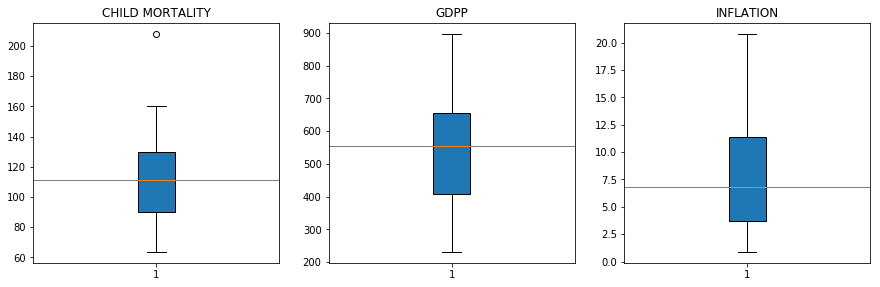

In [66]:
plt.figure(1 , figsize=(15, 15))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(3, 3, 1)
plt.title("CHILD MORTALITY")
plt.boxplot(h_selected['child_mort'] , patch_artist=True)
plt.axhline(111, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 2)
plt.title("GDPP")
plt.boxplot(h_selected['gdpp'], patch_artist=True)
plt.axhline(553, color='black', lw=.5)



# subplot 2 
plt.subplot(3, 3, 3)
plt.title("INFLATION")
plt.boxplot(h_selected['inflation'], patch_artist=True)
plt.axhline(6.81, color='black', lw=.5)



plt.show()

#### 19)  Let's pick all countries with child mortality >  90.5 (Q2/median) , GDPP < 482.0  (Q1) and inflation >6.81 (Q2/median) . This is in line with the requirement that countries in direst need of the aid should be helped and the plots reveal that these columns represent the most pressing needs of the poorest countries

In [67]:
h_selected_poor = h_selected.loc[(h_selected['child_mort'] >  90.5 )
                                & (h_selected['gdpp'] < 482.0)
                                & (h_selected['inflation'] > 6.81)] 

In [68]:
h_selected_poor

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,BURUNDI,0,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"CONGO, DEM. REP.",0,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
106,MOZAMBIQUE,0,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
132,SIERRA LEONE,0,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


#### Summary

`4 Poor countries that HELP has to immedeately focus are provided below ; incidentally all four are African countries` ; Incidentally, same results
are obtained by using K-means clustering as well

a) BURUNDI <br>
b) CONGO, DEM. REP. <br>
c) MOZAMBIQUE <br>
d) SIERRA LEONE <br>

In [69]:
# End of code, print total time taken for execution
print('\nTime elasped: ', datetime.now() - startTime)
#


Time elasped:  0:00:11.853732
